In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df_all_years = pd.read_csv(r"C:\Users\janin\OneDrive\Desktop\Python exercise\Project 3\ML capital bikeshare\df_all_year.csv")

In [3]:
df_all_years.columns

Index(['started_at', 'ended_at', 'duration', 'day_sort', 'start_station_id',
       'end_station_id', 'season', 'temperature', 'weather_condition',
       'customer_type', 'bike_type', 'start_lat', 'start_lng', 'end_lat',
       'end_lng', 'start_ward', 'end_ward'],
      dtype='object')

In [4]:
df_all_years.shape

(8290810, 17)

In [5]:
import pandas as pd

# Assuming df_all_years is already loaded

# Filter for rides longer than 1 minute (60 seconds) and shorter than 4 hours (14400 seconds)
df_filtered = df_all_years[(df_all_years['duration'] > 60) & (df_all_years['duration'] < 14400)]

# Display the filtered dataframe
df_filtered.head()


,started_at,ended_at,duration,day_sort,start_station_id,end_station_id,season,temperature,weather_condition,customer_type,bike_type,start_lat,start_lng,end_lat,end_lng,start_ward,end_ward
0,2021-01-01 00:14:32,2021-01-01 00:28:45,853.0,workday,31214.0,31119.0,winter,-0.9,rain,member,electric_bike,38.912138,-77.038568,38.920870,-77.031691,Ward 2,Ward 1
1,2021-01-01 00:17:46,2021-01-01 00:21:00,194.0,workday,31651.0,31649.0,winter,-0.9,rain,member,classic_bike,38.931322,-77.028247,38.931991,-77.032956,Ward 1,Ward 1
2,2021-01-01 00:19:06,2021-01-01 00:36:28,1042.0,workday,31617.0,31802.0,winter,-0.9,rain,casual,classic_bike,38.900413,-76.982872,38.867373,-76.988039,Ward 5,Ward 8
3,2021-01-01 00:21:19,2021-01-01 00:33:31,732.0,workday,31632.0,31650.0,winter,-0.9,rain,casual,docked_bike,38.897195,-76.983575,38.876893,-77.006072,Ward 7,Ward 6
4,2021-01-01 00:21:39,2021-01-01 00:31:07,568.0,workday,31131.0,31202.0,winter,-0.9,rain,member,classic_bike,38.934405,-77.032687,38.913046,-77.032008,Ward 1,Ward 2


In [6]:
df_filtered.shape

(8163369, 17)

### Split Data

In [8]:
import pandas as pd

# Assuming df_filtered is already loaded

# Ensure 'started_at' is in datetime format
df_filtered['started_at'] = pd.to_datetime(df_filtered['started_at'], errors='coerce')

# Check for any rows where 'started_at' could not be converted to datetime (if any)
print(df_filtered[df_filtered['started_at'].isnull()])

# Initialize the 'day_type' column
df_filtered['day_type'] = 'regular'

# Define the list of bank holidays
bank_holiday = ['2023-01-02', '2023-01-16', '2023-02-20', '2023-05-29', '2023-06-19', '2023-07-04', '2023-09-04', 
                '2023-10-09', '2023-11-10', '2023-11-23', '2023-12-25']

# Convert bank holiday dates to datetime
bank_holiday_dates = pd.to_datetime(bank_holiday).date

# Set 'day_type' to 'bank_holiday' where 'started_at' matches a bank holiday
df_filtered.loc[df_filtered['started_at'].dt.date.isin(bank_holiday_dates), 'day_type'] = 'bank_holiday'

# Define school holidays as tuples of start and end dates
school_holidays = [
    ('2023-02-18', '2023-02-24'),
    ('2023-03-15', '2023-03-21'),
    ('2023-07-01', '2023-08-27'),
    ('2023-11-22', '2023-11-26'),
    ('2023-12-22', '2023-12-31')
]

# Set 'day_type' to 'school_holidays' for dates between school holidays
for start, end in school_holidays:
    start_date = pd.to_datetime(start).date()
    end_date = pd.to_datetime(end).date()
    df_filtered.loc[df_filtered['started_at'].dt.date.between(start_date, end_date), 'day_type'] = 'school_holidays'

# Check the changes in the dataframe
print(df_filtered[['started_at', 'day_type']].head())


C:\Users\janin\AppData\Local\Temp\ipykernel_18084\3828432384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['started_at'] = pd.to_datetime(df_filtered['started_at'], errors='coerce')
C:\Users\janin\AppData\Local\Temp\ipykernel_18084\3828432384.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_type'] = 'regular'


Empty DataFrame
Columns: [started_at, ended_at, duration, day_sort, start_station_id, end_station_id, season, temperature, weather_condition, customer_type, bike_type, start_lat, start_lng, end_lat, end_lng, start_ward, end_ward, day_type]
Index: []
           started_at day_type
0 2021-01-01 00:14:32  regular
1 2021-01-01 00:17:46  regular
2 2021-01-01 00:19:06  regular
3 2021-01-01 00:21:19  regular
4 2021-01-01 00:21:39  regular


In [9]:
df_filtered['started_at'] = pd.to_datetime(df_filtered['started_at'])


df_2021 = df_filtered[df_filtered['started_at'].dt.year == 2021]

df_2022 = df_filtered[df_filtered['started_at'].dt.year == 2022]

df_2023 = df_filtered[df_filtered['started_at'].dt.year == 2023]

C:\Users\janin\AppData\Local\Temp\ipykernel_18084\2722801225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['started_at'] = pd.to_datetime(df_filtered['started_at'])


In [10]:
df_2023.head()

,started_at,ended_at,duration,day_sort,start_station_id,end_station_id,season,temperature,weather_condition,customer_type,bike_type,start_lat,start_lng,end_lat,end_lng,start_ward,end_ward,day_type
4948498,2023-01-01 00:03:48,2023-01-01 00:41:23,2255.0,weekend,31258.0,31204.0,winter,8.4,cloudy,member,classic_bike,38.888255,-77.049436,38.896300,-77.045000,Ward 2,Ward 2,regular
4948499,2023-01-01 00:05:08,2023-01-01 00:16:09,661.0,weekend,31119.0,31122.0,winter,8.4,cloudy,member,electric_bike,38.921118,-77.031776,38.928893,-77.036250,Ward 1,Ward 1,regular
4948500,2023-01-01 00:07:13,2023-01-01 00:16:43,570.0,weekend,31245.0,31278.0,winter,8.4,cloudy,member,classic_bike,38.912719,-77.022155,38.912648,-77.041834,Ward 2,Ward 2,regular
4948501,2023-01-01 00:07:28,2023-01-01 01:04:38,3430.0,weekend,31248.0,31297.0,winter,8.4,cloudy,casual,classic_bike,38.888774,-77.028694,38.898460,-77.053052,Ward 2,Ward 2,regular
4948502,2023-01-01 00:08:09,2023-01-01 00:14:28,379.0,weekend,31126.0,31107.0,winter,8.4,cloudy,member,classic_bike,38.925636,-77.027112,38.931900,-77.038800,Ward 1,Ward 1,regular


In [11]:
df_2023['weather_condition'].nunique()

5

In [12]:
import pandas as pd

# Step 1: Ensure the 'started_at' and 'ended_at' columns are in datetime format
df_2023['started_at'] = pd.to_datetime(df_2023['started_at'])
df_2023['ended_at'] = pd.to_datetime(df_2023['ended_at'])

# Step 2: Extract the date from 'started_at' and add a 'date' column for grouping
df_2023['date'] = df_2023['started_at'].dt.date

# Step 3: Group by 'date' and calculate the cumulative count of rides per day
df_2023['total_rides'] = df_2023.groupby('date').cumcount() + 1  # +1 to start count at 1

# Check the result
print(df_2023[['started_at', 'date', 'total_rides']].head())


C:\Users\janin\AppData\Local\Temp\ipykernel_18084\2893673042.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['started_at'] = pd.to_datetime(df_2023['started_at'])
C:\Users\janin\AppData\Local\Temp\ipykernel_18084\2893673042.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['ended_at'] = pd.to_datetime(df_2023['ended_at'])
C:\Users\janin\AppData\Local\Temp\ipykernel_18084\2893673042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

                 started_at        date  total_rides
4948498 2023-01-01 00:03:48  2023-01-01            1
4948499 2023-01-01 00:05:08  2023-01-01            2
4948500 2023-01-01 00:07:13  2023-01-01            3
4948501 2023-01-01 00:07:28  2023-01-01            4
4948502 2023-01-01 00:08:09  2023-01-01            5


C:\Users\janin\AppData\Local\Temp\ipykernel_18084\2893673042.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['total_rides'] = df_2023.groupby('date').cumcount() + 1  # +1 to start count at 1


In [13]:
df_2023.dtypes

started_at           datetime64[ns]
ended_at             datetime64[ns]
duration                    float64
day_sort                     object
start_station_id            float64
end_station_id              float64
season                       object
temperature                 float64
weather_condition            object
customer_type                object
bike_type                    object
start_lat                   float64
start_lng                   float64
end_lat                     float64
end_lng                     float64
start_ward                   object
end_ward                     object
day_type                     object
date                         object
total_rides                   int64
dtype: object

In [14]:
# Check for NaN values in the entire DataFrame
nan_summary = df_2023.isna().sum()

# Print columns with NaN values
print("Columns with NaN values:")
print(nan_summary[nan_summary > 0])

# Optional: print a summary of NaN counts across all columns
print("\nTotal NaN values in the dataset:", df_2023.isna().sum().sum())


Columns with NaN values:
Series([], dtype: int64)

Total NaN values in the dataset: 0


Correlation Matrix

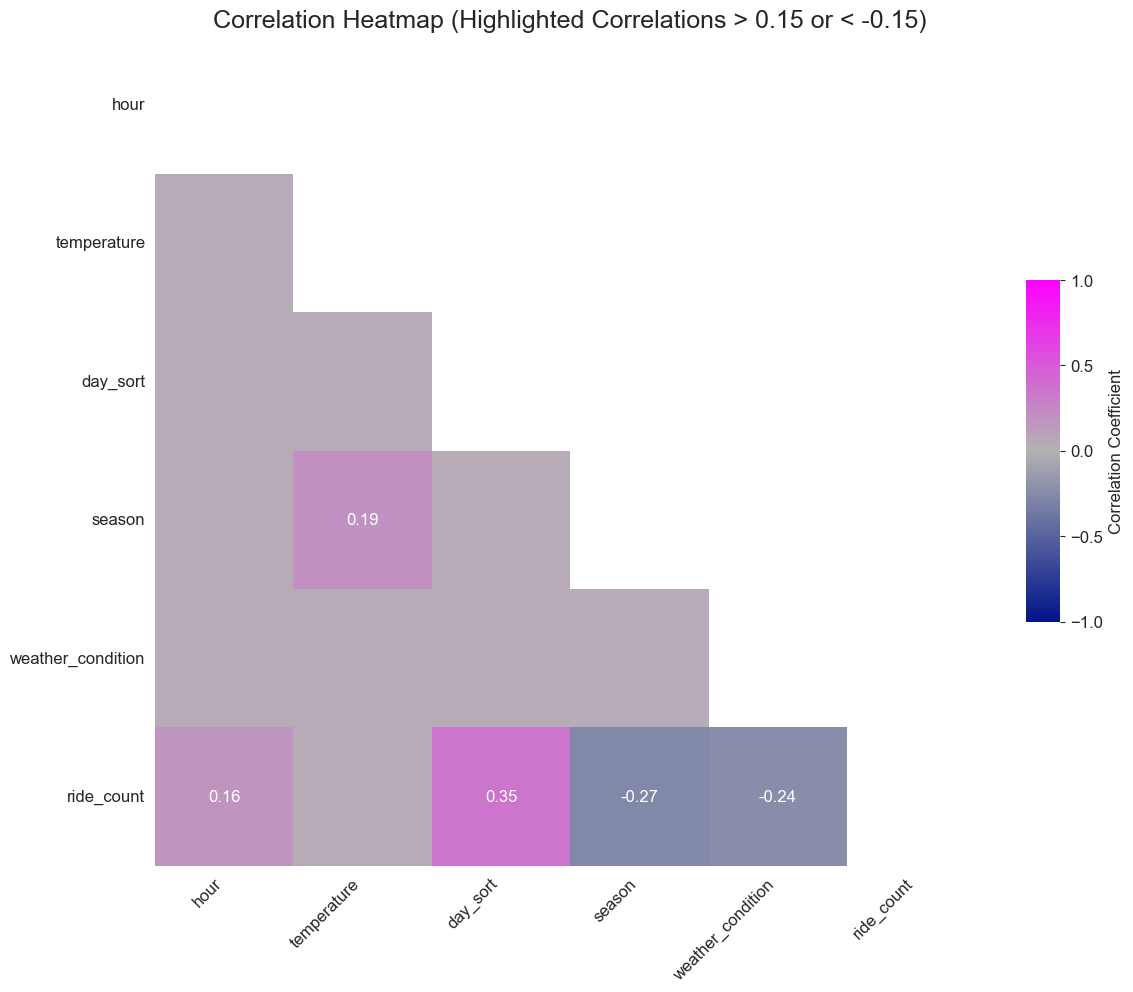

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import LinearSegmentedColormap

# Set style for the plot
sns.set_style("white")

# Ensure 'hour' is extracted from 'started_at' if it doesn't already exist
if 'hour' not in df_2023.columns:
    df_2023['hour'] = pd.to_datetime(df_2023['started_at']).dt.hour

# Filter data for only Ward 7 and Ward 8 based on 'start_ward'
df_ward_7_8 = df_2023[df_2023['start_ward'].isin(['Ward 7', 'Ward 8'])]

# Ensure 'ride_count' column is created by grouping by relevant columns
ride_count = df_ward_7_8.groupby(['hour', 'day_sort', 'season', 'weather_condition']).size().reset_index(name='ride_count')

# Merge the 'ride_count' back to the filtered DataFrame
df_ward_7_8 = df_ward_7_8.merge(ride_count, on=['hour', 'day_sort', 'season', 'weather_condition'], how='left')

# Encode categorical variables into numeric values using LabelEncoder
le = LabelEncoder()

# Encode 'day_sort' (workday/weekend) and 'weather_condition' (cloudy/rain/snow etc.)
df_ward_7_8['day_sort'] = le.fit_transform(df_ward_7_8['day_sort'])
df_ward_7_8['weather_condition'] = le.fit_transform(df_ward_7_8['weather_condition'])
df_ward_7_8['season'] = le.fit_transform(df_ward_7_8['season'])  # Encode the season as well if needed

# Prepare the list of columns for the correlation matrix, using the encoded columns
columns_encoded = ['hour', 'temperature', 'day_sort', 'season', 'weather_condition', 'ride_count']

# Select only numeric columns for the correlation matrix
numeric_data = df_ward_7_8[columns_encoded]

# Create the correlation matrix
correlation_matrix = numeric_data.corr()

# Create the mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Define threshold for showing the full color range
threshold = 0.15

# Create a copy of the correlation matrix for colors
colored_matrix = correlation_matrix.copy()

# Apply a medium-tone value for correlations between -0.15 and 0.15 (grey tone)
mid_tone_value = 0.04  # This will be shown as medium grey
colored_matrix[(correlation_matrix <= threshold) & (correlation_matrix >= -threshold)] = mid_tone_value

# Prepare the annotation matrix: Only annotate values > 0.15 or < -0.15
annot_matrix = np.where((correlation_matrix > threshold) | (correlation_matrix < -threshold), correlation_matrix.round(2), "")

# Define custom color map with a neutral middle range (for correlations between -0.15 and 0.15)
cmap = LinearSegmentedColormap.from_list(
    "custom_palette",
    [(0, (0/255, 20/255, 137/255)),  # Yves Klein Blue for strong negative correlations
     (0.5, (0.7, 0.7, 0.7)),          # Neutral grey for mid correlations
     (1, (255/255, 0/255, 255/255))],  # Neon Purple for strong positive correlations
    N=256
)

# Font size parameters (you can adjust these values to change the font size throughout the plot)
font_title_size = 18      # Font size for the title
font_axis_label_size = 14 # Font size for the axis labels
font_tick_label_size = 12 # Font size for the tick labels
font_annot_size = 12      # Font size for the annotations on the heatmap
font_colorbar_size = 12   # Font size for the colorbar label

# Set up the matplotlib figure
plt.figure(figsize=(12, 12))

# Draw the heatmap with color range from -1 to 1, ensuring the color scale is aligned with the color bar
sns.heatmap(colored_matrix, annot=annot_matrix, mask=mask, cmap=cmap, 
            cbar=True, 
            vmin=-1, vmax=1,  # Set the color range from -1 to 1 to match the correlation range
            cbar_kws={'label': 'Correlation Coefficient', 
                      'shrink': 0.3, 
                      'aspect': 10, 
                      'pad': 0.04, 
                      'ticks': [-1, -0.5, 0, 0.5, 1]},  # Set colorbar ticks to match the -1 to 1 range
            square=True, 
            fmt="",  # Disable formatting for non-annotated cells and set annot color
            annot_kws={'size': font_annot_size})  # Set annotation font size

# Add title with custom font size
plt.title('Correlation Heatmap (Highlighted Correlations > 0.15 or < -0.15)', fontsize=font_title_size)

# Adjust the font size for the x and y axis labels
plt.xticks(rotation=45, ha='right', fontsize=font_tick_label_size)
plt.yticks(rotation=0, fontsize=font_tick_label_size)

# Adjust colorbar ticks and label font size
colorbar = plt.gca().collections[0].colorbar
colorbar.ax.tick_params(labelsize=font_colorbar_size)  # Set font size for colorbar ticks
colorbar.set_label('Correlation Coefficient', fontsize=font_colorbar_size)  # Set font size for colorbar label

# Display the plot with tight layout to avoid clipping
plt.tight_layout()
plt.show()


### Machine Learning

C:\Users\janin\AppData\Local\Temp\ipykernel_18084\3305933119.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['started_at'] = pd.to_datetime(df_2023['started_at'])
C:\Users\janin\AppData\Local\Temp\ipykernel_18084\3305933119.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['hour'] = df_2023['started_at'].dt.hour
C:\Users\janin\AppData\Local\Temp\ipykernel_18084\3305933119.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

   hour  day_type  ride_count  season_spring  season_summer  season_winter  \
0     0         0          20          False          False          False   
1     0         0         137          False          False          False   
2     0         0           6          False          False          False   
3     0         0          17           True          False          False   
4     0         0         100           True          False          False   

   weather_condition_cloudy  weather_condition_drizzle  \
0                     False                      False   
1                      True                      False   
2                     False                      False   
3                     False                      False   
4                      True                      False   

   weather_condition_rain  weather_condition_snow  
0                   False                   False  
1                   False                   False  
2                    True 

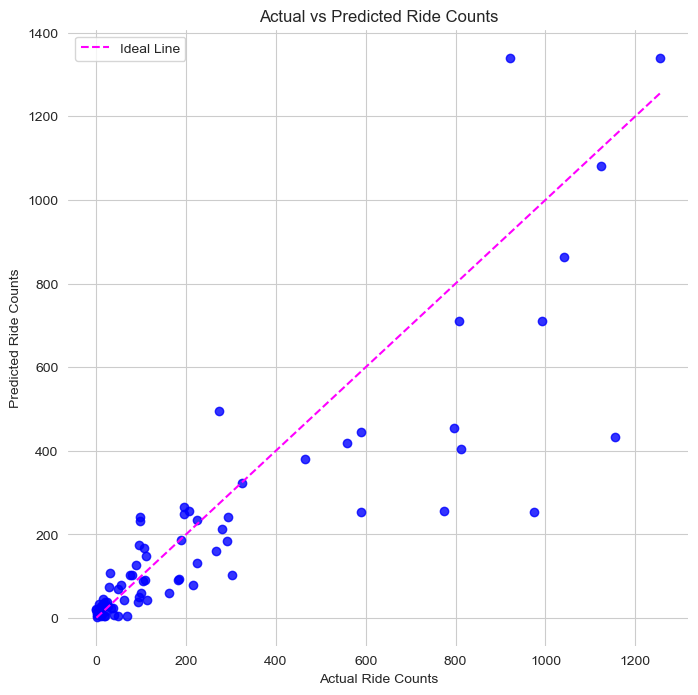

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_2023 is the dataset you have

# Ensure 'started_at' is a datetime column
df_2023['started_at'] = pd.to_datetime(df_2023['started_at'])

# Extract hour from the 'started_at' column
df_2023['hour'] = df_2023['started_at'].dt.hour

# Encode 'day_type' as 0 for weekday, 1 for weekend
df_2023['day_type'] = df_2023['day_type'].apply(lambda x: 1 if x == 'weekend' else 0)

# Filter the data to include only rides starting in Ward 7 or Ward 8
ward_7_and_8 = df_2023[df_2023['start_ward'].isin(['Ward 7', 'Ward 8'])]

# Group by hour, temperature, and day_type, and count the number of rides in each group
ride_counts = ward_7_and_8.groupby(['hour', 'season', 'weather_condition', 'day_type']).size().reset_index(name='ride_count')

# One-hot encode 'season' and 'weather_condition' columns
ride_counts = pd.get_dummies(ride_counts, columns=['season', 'weather_condition'], drop_first=True)

# Show the first few rows of the prepared data
print(ride_counts.head())

# Step 1: Standardize the Features (for the regression)
scaler = StandardScaler()
X = ride_counts[['hour', 'day_type', 'season_winter', 'weather_condition_cloudy', 'weather_condition_rain']]
X_scaled = scaler.fit_transform(X)  # Standardize the features

# Step 2: Apply PolynomialFeatures
poly = PolynomialFeatures(degree=2)  # Degree 3 for polynomial terms
X_poly = poly.fit_transform(X_scaled)  # Transform features into polynomial features

# Step 3: Log-transform the target variable to handle skewness
y = ride_counts['ride_count']
y_log = np.log1p(y)  # Log transformation of ride_count to reduce skewness

# Step 4: Split the Data Into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_log, test_size=0.2, random_state=42)

# Step 5: Initialize the Linear Regression Model
model = LinearRegression()

# Step 6: Fit the Model on Training Data
model.fit(X_train, y_train)

# Step 7: Make Predictions on Test Data
y_pred_log = model.predict(X_test)  # Predict in the log scale

# Step 8: Inverse the Log Transformation on Predictions
y_pred = np.expm1(y_pred_log)  # Inverse of log transformation to get the original scale

# Step 9: Calculate the Mean Squared Error
mse = mean_squared_error(np.expm1(y_test), y_pred)  # Compare the actual vs predicted
print(f"Mean Squared Error: {mse}")

# Step 10: Calculate R-squared (R²)
r2 = r2_score(np.expm1(y_test), y_pred)  # Compare actual and predicted on the original scale
print(f"R-squared: {r2}")

# Step 11: Plot Actual vs Predicted
sns.set_style("whitegrid")

# Plot the scatter plot for actual vs predicted ride counts
plt.figure(figsize=(8, 8))
plt.scatter(np.expm1(y_test), y_pred, color='blue', alpha=0.8)  # Scatter plot

# Ideal line (where actual = predicted)
plt.plot([np.expm1(y_test).min(), np.expm1(y_test).max()],
         [np.expm1(y_test).min(), np.expm1(y_test).max()],
         color='magenta', linestyle='--', label="Ideal Line")

# Labeling the plot
plt.xlabel('Actual Ride Counts')
plt.ylabel('Predicted Ride Counts')
plt.title('Actual vs Predicted Ride Counts')

# Hide the outer border lines for a cleaner look
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')

# Show the legend
plt.legend()

# Show the plot
plt.show()

C:\Users\janin\AppData\Local\Temp\ipykernel_18084\1486381169.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['started_at'] = pd.to_datetime(df_2023['started_at'])
C:\Users\janin\AppData\Local\Temp\ipykernel_18084\1486381169.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['hour'] = df_2023['started_at'].dt.hour
C:\Users\janin\AppData\Local\Temp\ipykernel_18084\1486381169.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

   hour  day_type  ride_count  season_spring  season_summer  season_winter  \
0     0         0          20          False          False          False   
1     0         0         137          False          False          False   
2     0         0           6          False          False          False   
3     0         0          17           True          False          False   
4     0         0         100           True          False          False   

   weather_condition_cloudy  weather_condition_drizzle  \
0                     False                      False   
1                      True                      False   
2                     False                      False   
3                     False                      False   
4                      True                      False   

   weather_condition_rain  weather_condition_snow  
0                   False                   False  
1                   False                   False  
2                    True 

c:\Users\janin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


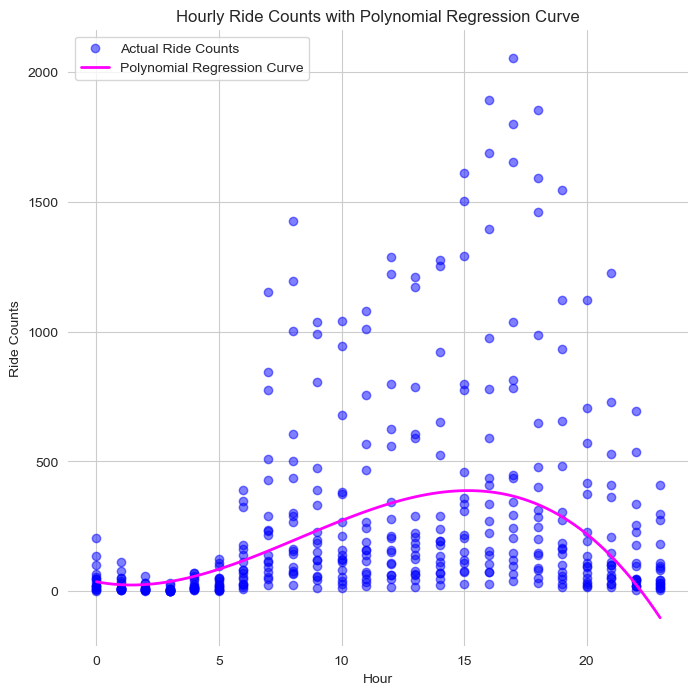

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_2023 is the dataset you have

# Ensure 'started_at' is a datetime column
df_2023['started_at'] = pd.to_datetime(df_2023['started_at'])

# Extract hour from the 'started_at' column
df_2023['hour'] = df_2023['started_at'].dt.hour

# Encode 'day_type' as 0 for weekday, 1 for weekend
df_2023['day_type'] = df_2023['day_type'].apply(lambda x: 1 if x == 'weekend' else 0)

# Filter the data to include only rides starting in Ward 7 or Ward 8
ward_7_and_8 = df_2023[df_2023['start_ward'].isin(['Ward 7', 'Ward 8'])]

# Group by hour, season, weather_condition, and day_type, and count the number of rides in each group
ride_counts = ward_7_and_8.groupby(['hour', 'season', 'weather_condition', 'day_type']).size().reset_index(name='ride_count')

# One-hot encode 'season' and 'weather_condition' columns
ride_counts = pd.get_dummies(ride_counts, columns=['season', 'weather_condition'], drop_first=True)

# Show the first few rows of the prepared data
print(ride_counts.head())

# Step 1: Apply PolynomialFeatures (degree 3 for a smooth curve)
poly = PolynomialFeatures(degree=3)  # Increase degree to capture non-linear relationship
X_poly = poly.fit_transform(ride_counts[['hour', 'day_type', 'season_winter', 'weather_condition_cloudy', 'weather_condition_rain']])  # Apply to the feature set

# Step 2: Prepare target variable (ride counts)
y = ride_counts['ride_count']

# Step 3: Initialize the Linear Regression Model
model = LinearRegression()

# Step 4: Fit the Model on All Data (no train-test split for continuous hour plot)
model.fit(X_poly, y)

# Step 5: Generate Predictions for Hours (for the curve)
# We will predict over a range of hours (0 to 23) and for each hour we will set other features constant at their mean
hour_range = np.linspace(0, 23, 100).reshape(-1, 1)

# Keep other features (day_type, season, weather_condition) at their average values for smooth curve
average_day_type = ride_counts['day_type'].mean()
average_season_winter = ride_counts['season_winter'].mean()
average_weather_condition_cloudy = ride_counts['weather_condition_cloudy'].mean()
average_weather_condition_rain = ride_counts['weather_condition_rain'].mean()

# Prepare the input for polynomial features (i.e., all hours with constant values for other features)
X_poly_for_curve = np.column_stack([
    hour_range,
    np.full(hour_range.shape, average_day_type), 
    np.full(hour_range.shape, average_season_winter),
    np.full(hour_range.shape, average_weather_condition_cloudy),
    np.full(hour_range.shape, average_weather_condition_rain)
])

# Apply the polynomial features transformation
X_poly_for_curve_transformed = poly.transform(X_poly_for_curve)

# Get the predicted ride counts for the polynomial regression curve
y_curve = model.predict(X_poly_for_curve_transformed)

# Step 6: Plot the actual ride counts vs hours as scatter plot and the polynomial regression curve
plt.figure(figsize=(8, 8))

# Plot scatter plot of actual ride counts vs hours
plt.scatter(ride_counts['hour'], ride_counts['ride_count'], color='blue', alpha=0.5, label='Actual Ride Counts')

# Plot the polynomial regression curve
plt.plot(hour_range, y_curve, color='magenta', linewidth=2, label="Polynomial Regression Curve")

# Labeling the plot
plt.xlabel('Hour')
plt.ylabel('Ride Counts')
plt.title('Hourly Ride Counts with Polynomial Regression Curve')


# Hide the outer border lines for a cleaner look
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')

# Show the legend
plt.legend()

# Show the plot
plt.show()



C:\Users\janin\AppData\Local\Temp\ipykernel_18084\2332952338.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['started_at'] = pd.to_datetime(df_2023['started_at'])
C:\Users\janin\AppData\Local\Temp\ipykernel_18084\2332952338.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['hour'] = df_2023['started_at'].dt.hour
C:\Users\janin\AppData\Local\Temp\ipykernel_18084\2332952338.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

   hour  day_type  ride_count  season_spring  season_summer  season_winter  \
0     0         0          20          False          False          False   
1     0         0         137          False          False          False   
2     0         0           6          False          False          False   
3     0         0          17           True          False          False   
4     0         0         100           True          False          False   

   weather_condition_cloudy  weather_condition_drizzle  \
0                     False                      False   
1                      True                      False   
2                     False                      False   
3                     False                      False   
4                      True                      False   

   weather_condition_rain  weather_condition_snow  
0                   False                   False  
1                   False                   False  
2                    True 

c:\Users\janin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


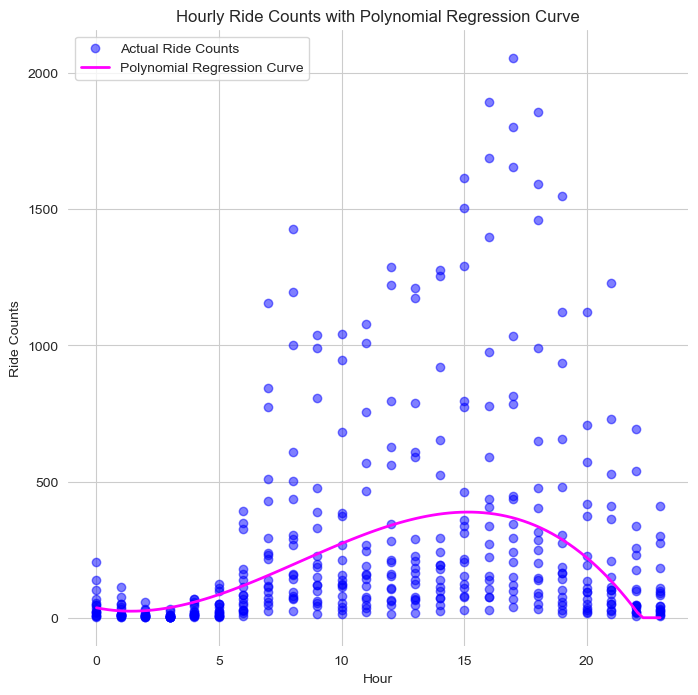

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_2023 is the dataset you have

# Ensure 'started_at' is a datetime column
df_2023['started_at'] = pd.to_datetime(df_2023['started_at'])

# Extract hour from the 'started_at' column
df_2023['hour'] = df_2023['started_at'].dt.hour

# Encode 'day_type' as 0 for weekday, 1 for weekend
df_2023['day_type'] = df_2023['day_type'].apply(lambda x: 1 if x == 'weekend' else 0)

# Filter the data to include only rides starting in Ward 7 or Ward 8
ward_7_and_8 = df_2023[df_2023['start_ward'].isin(['Ward 7', 'Ward 8'])]

# Group by hour, season, weather_condition, and day_type, and count the number of rides in each group
ride_counts = ward_7_and_8.groupby(['hour', 'season', 'weather_condition', 'day_type']).size().reset_index(name='ride_count')

# One-hot encode 'season' and 'weather_condition' columns
ride_counts = pd.get_dummies(ride_counts, columns=['season', 'weather_condition'], drop_first=True)

# Show the first few rows of the prepared data
print(ride_counts.head())

# Step 1: Apply PolynomialFeatures (degree 3 for a smooth curve)
poly = PolynomialFeatures(degree=3)  # Increase degree to 3 to capture more non-linear patterns
X_poly = poly.fit_transform(ride_counts[['hour', 'day_type', 'season_winter', 'weather_condition_cloudy', 'weather_condition_rain']])

# Step 2: Prepare target variable (ride counts)
y = ride_counts['ride_count']

# Step 3: Initialize the Linear Regression Model
model = LinearRegression()

# Step 4: Fit the Model on All Data (no train-test split for continuous hour plot)
model.fit(X_poly, y)

# Step 5: Generate Predictions for Hours (for the curve)
hour_range = np.linspace(0, 23, 100).reshape(-1, 1)  # Ensure hour_range is a 2D array

# Keep other features (day_type, season, weather_condition) at their average values for smooth curve
average_day_type = ride_counts['day_type'].mean()
average_season_winter = ride_counts['season_winter'].mean()
average_weather_condition_cloudy = ride_counts['weather_condition_cloudy'].mean()
average_weather_condition_rain = ride_counts['weather_condition_rain'].mean()

# Prepare the input for polynomial features (i.e., all hours with constant values for other features)
X_poly_for_curve = np.column_stack([
    hour_range.flatten(),  # Flatten to ensure proper array shape for each feature
    np.full(hour_range.shape, average_day_type),
    np.full(hour_range.shape, average_season_winter),
    np.full(hour_range.shape, average_weather_condition_cloudy),
    np.full(hour_range.shape, average_weather_condition_rain)
])

# Apply the polynomial features transformation
X_poly_for_curve_transformed = poly.transform(X_poly_for_curve)

# Get the predicted ride counts for the polynomial regression curve
y_curve = model.predict(X_poly_for_curve_transformed)

# **Clip negative values to ensure non-negative ride counts**
y_curve = np.clip(y_curve, 0, None)  # This will set all negative values to 0

# Step 6: Plot the actual ride counts vs hours as scatter plot and the polynomial regression curve
plt.figure(figsize=(8, 8))

# Plot scatter plot of actual ride counts vs hours
plt.scatter(ride_counts['hour'], ride_counts['ride_count'], color='blue', alpha=0.5, label='Actual Ride Counts')

# Plot the polynomial regression curve
plt.plot(hour_range, y_curve, color='magenta', linewidth=2, label="Polynomial Regression Curve")

# Labeling the plot
plt.xlabel('Hour')
plt.ylabel('Ride Counts')
plt.title('Hourly Ride Counts with Polynomial Regression Curve')

# Hide the outer border lines for a cleaner look
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')

# Show the legend
plt.legend()

# Show the plot
plt.show()
